In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def exp_smooth(Y,alpha):
    smooth = [0]
    for t in range(1, len(Y)):
        smooth.append( (1-alpha)*Y[t] + (alpha)* smooth[t-1])
        
    return smooth

def objective(Y,alpha,k_ahead):
    data = pd.DataFrame({'Y':Y, 'est':exp_smooth(Y,alpha)})
    data['est'] = data['est'].shift(k_ahead)
    data = data.dropna()
    
    sum_squares = np.square(data['Y'] - data['est']).sum()
    return sum_squares


def minimal_alpha(Y, k_ahead):
    obj_df = pd.DataFrame(columns = ['alpha','value'])
    
    obj_df['alpha'] = np.linspace(0,1,50)
    obj_df['value'] = obj_df['alpha'].apply(lambda s: objective(Y,s,k_ahead))
    
    min_val = obj_df['value'].min()
    return obj_df.set_index('value').loc[min_val,'alpha']

In [12]:
def generate_data(sample_size, alpha_not):
    Y = [np.random.normal(0,1,1)[0]]
    level = [alpha_not * np.random.normal(0,1,1)[0]]
    
    for time_period in range(1, sample_size):
        epsilon = np.random.normal(0,1,1)[0]
        Y.append( level[time_period-1] +epsilon )
        level.append( level[time_period-1] + alpha_not*epsilon )
    return Y

0.7755102040816326

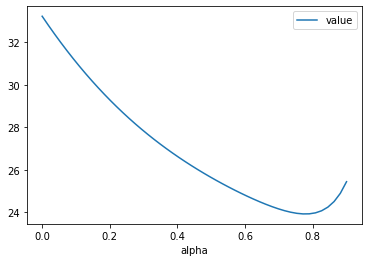

In [41]:
test_data = generate_data(20,.5)

obj_df = pd.DataFrame(columns = ['alpha','value'])
    
obj_df['alpha'] = np.linspace(0,.9,50)
obj_df['value'] = obj_df['alpha'].apply(lambda s: objective(test_data,s,1))

obj_df.plot(x='alpha',y='value')

minimal_alpha(test_data,1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F2DACC1430>]],
      dtype=object)

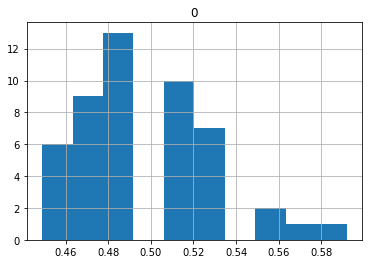

In [57]:
est_list = []

for r in range(1,50):
    test_data = generate_data(500,.5)
    est_list.append( minimal_alpha(test_data,1) )

pd.DataFrame(est_list).hist()

In [58]:
pd.DataFrame(est_list).mean()[0]

0.497292794668888